In [1]:
# Preparing Dataset
!pip install split-folders
import splitfolders
import zipfile
import os

# Visualize 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg

# Data Preprocessing & Modelling
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
from keras_preprocessing import image
from keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import layers
from tensorflow.keras import Model

# Evaluate
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
from google.colab import files
from keras.utils import image_utils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Konfigurasi google colab dengan google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Extract Zip File Dataset
zip_file =zipfile.ZipFile('/content/drive/MyDrive/cat_dataset/cat dataset.zip')
zip_file.extractall('/tmp')

In [4]:
# Split Dataset
input_folder = '/tmp/cat dataset/Cat_Breeds-Dataset'
splitfolders.ratio(input_folder, output='/tmp/cat dataset/cat_dataset', seed=42, ratio=(.8, .1, .1))

Copying files: 2400 files [00:01, 1240.67 files/s]


In [6]:
# Visualize Dataset
train_dir = '/tmp/cat dataset/cat_dataset/train'
list_category = sorted(os.listdir(train_dir))
list_category

['Abyssinian',
 'Bengal',
 'Birman',
 'Bombay',
 'British_Shorthair',
 'Egyptian_Mau',
 'Maine_Coon',
 'Persian',
 'Ragdoll',
 'Russian_Blue',
 'Siamese',
 'Sphynx']

Abyssinian


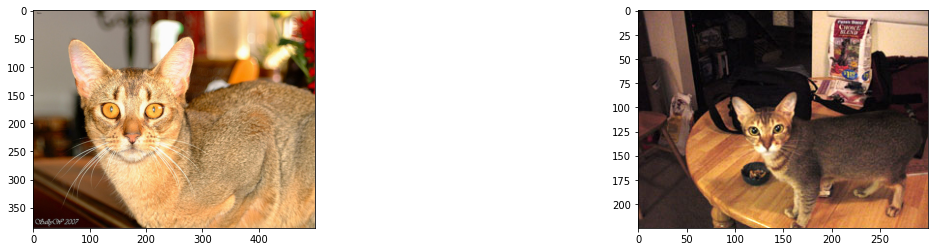

Bengal


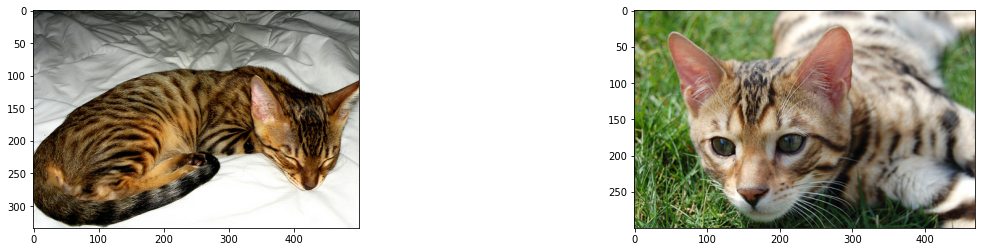

Birman


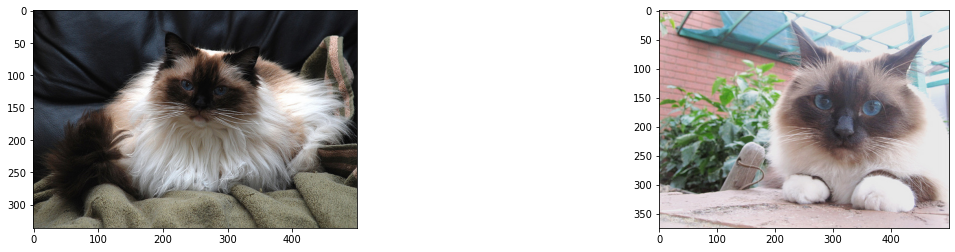

Bombay


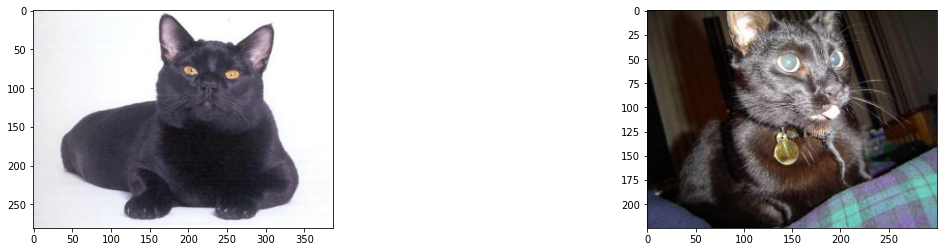

British_Shorthair


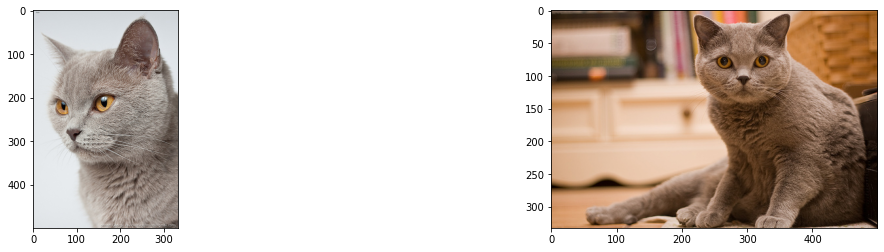

Egyptian_Mau


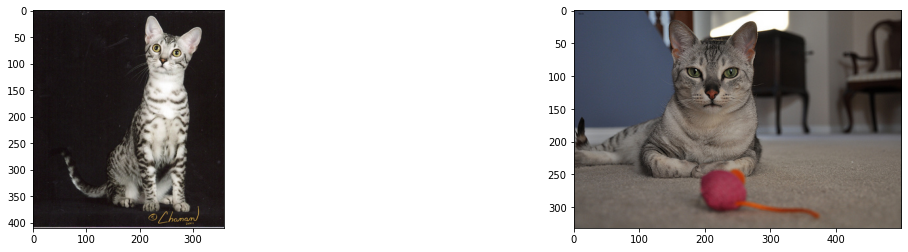

Maine_Coon


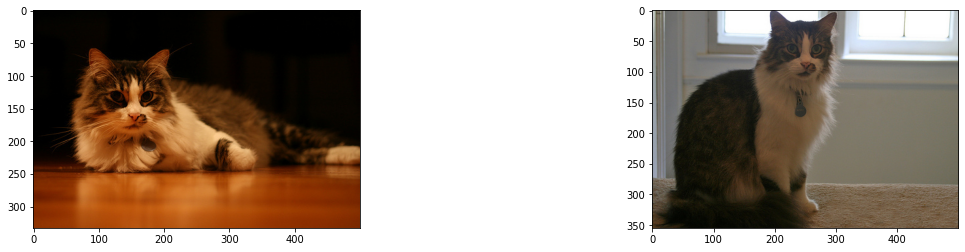

Persian


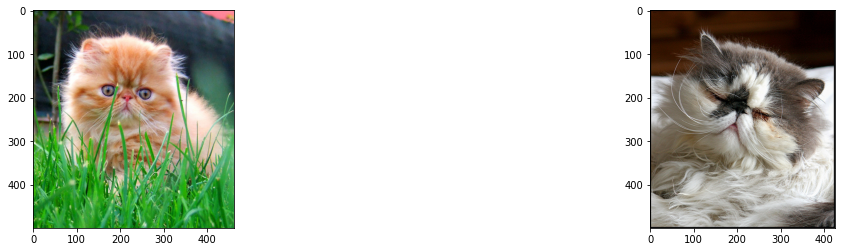

Ragdoll


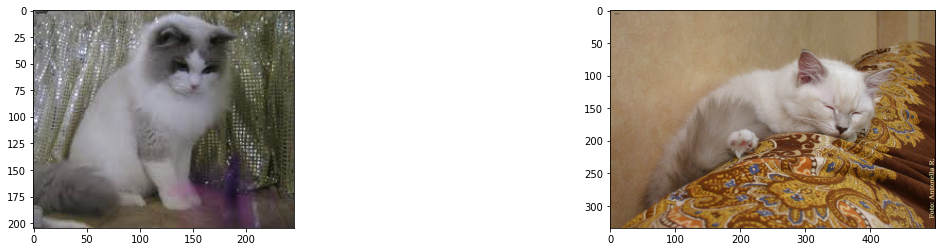

Russian_Blue


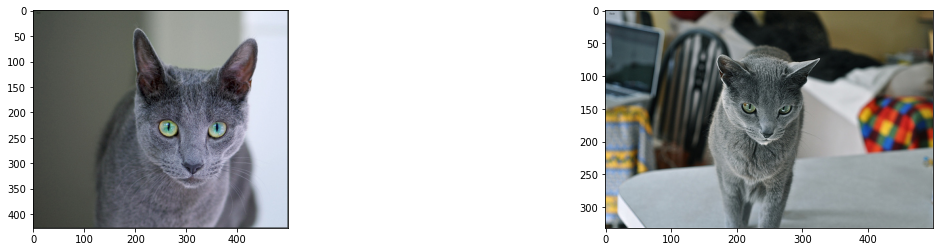

Siamese


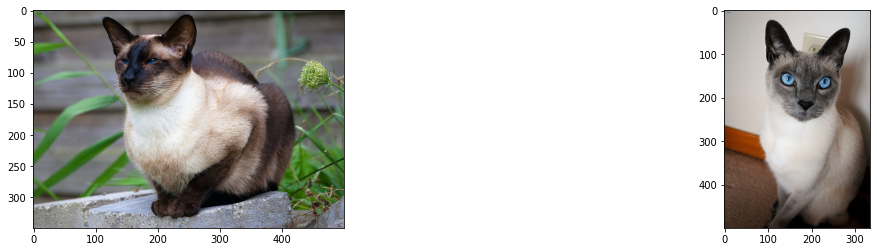

Sphynx


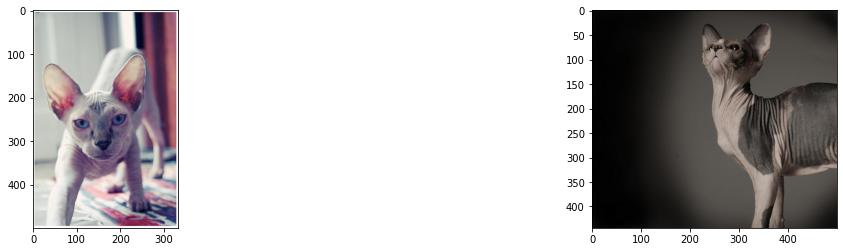

In [7]:
for  item in list_category:
  print(item)
  class_dir = os.path.join(train_dir,item)
  class_images = os.listdir(class_dir)
  plt.figure(figsize=(20, 4))
  for i, img_path in enumerate(class_images[:2]):
    sp = plt.subplot(1, 2, i+1)
    img = mpimg.imread(os.path.join(class_dir, img_path))
    plt.imshow(img)
  plt.show()

In [8]:
BATCH_SIZE = 16
IMG_SIZE = (150, 150)

TRAINING_DIR = '/tmp/cat dataset/cat_dataset/train'
train_datagen = image.ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(TRAINING_DIR, 
                                                    class_mode='sparse', 
                                                    batch_size=BATCH_SIZE, 
                                                    target_size=IMG_SIZE)


VALIDATION_DIR = '/tmp/cat dataset/cat_dataset/val'
val_datagen = image.ImageDataGenerator(rescale = 1.0/255.0)
val_generator = val_datagen.flow_from_directory(VALIDATION_DIR, 
                                                class_mode='sparse', 
                                                batch_size=BATCH_SIZE, 
                                                target_size=IMG_SIZE)

TESTING_DIR = '/tmp/cat dataset/cat_dataset/test'

test_datagen = image.ImageDataGenerator(rescale = 1.0/255.0)

test_generator = test_datagen.flow_from_directory(TESTING_DIR, 
                                             class_mode='sparse', 
                                             batch_size=BATCH_SIZE, 
                                             target_size=IMG_SIZE,
                                             shuffle=False)

Found 1920 images belonging to 12 classes.
Found 240 images belonging to 12 classes.
Found 240 images belonging to 12 classes.


In [9]:
# Checking Data Preprocessing Result
train_dataset = image_dataset_from_directory(TRAINING_DIR,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE)

Found 1920 files belonging to 12 classes.


In [10]:
class_names = train_dataset.class_names
print(class_names)

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx']


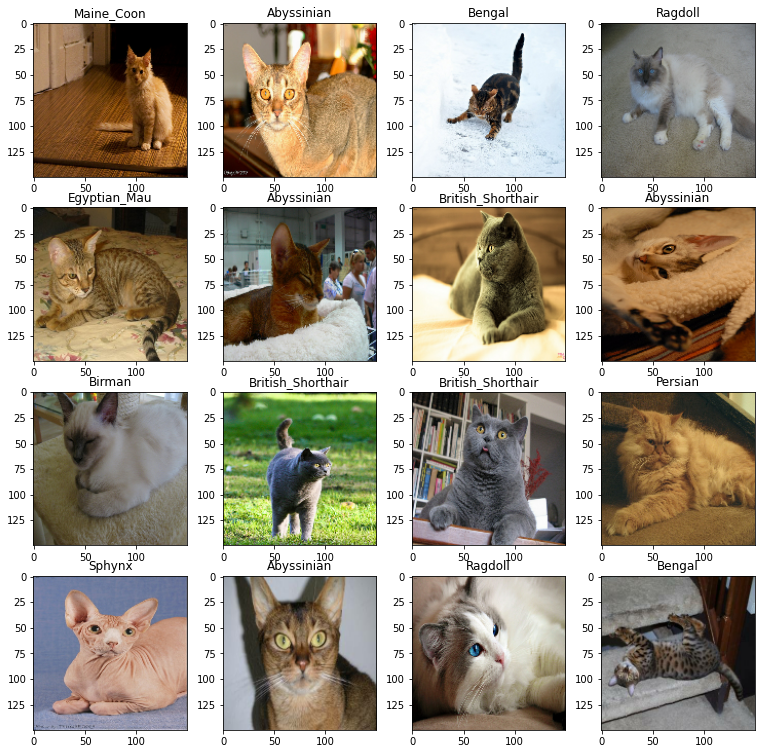

In [11]:
plt.figure(figsize=(13, 13))
for images, labels in train_dataset.take(1):
  for i in range(BATCH_SIZE):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])

In [12]:
pretrained_model = InceptionV3(input_shape = (150,150,3),
                                include_top = False,
                                weights = 'imagenet')

for layer in pretrained_model.layers:
    layer.trainable = False

last_layer = pretrained_model.get_layer('mixed5')
last_output = last_layer.output

x = layers.Flatten()(last_output)
x = layers.Dense(64, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(12, activation='softmax')(x)

In [13]:
model = Model(pretrained_model.input, x)

In [14]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.0001), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                              

In [15]:
history = model.fit(train_generator, 
                     epochs=10,
                     validation_data=val_generator, 
                     verbose=1)

Epoch 1/10
120/120 [==============================] - 80s 640ms/step - loss: 1.8565 - accuracy: 0.4016 - val_loss: 1.2537 - val_accuracy: 0.5667
Epoch 2/10
120/120 [==============================] - 76s 634ms/step - loss: 0.6969 - accuracy: 0.8146 - val_loss: 1.0368 - val_accuracy: 0.6417
Epoch 3/10
120/120 [==============================] - 76s 631ms/step - loss: 0.4090 - accuracy: 0.9214 - val_loss: 0.9823 - val_accuracy: 0.6583
Epoch 4/10
120/120 [==============================] - 75s 628ms/step - loss: 0.2338 - accuracy: 0.9812 - val_loss: 0.9425 - val_accuracy: 0.6792
Epoch 5/10
120/120 [==============================] - 76s 635ms/step - loss: 0.1600 - accuracy: 0.9943 - val_loss: 0.9098 - val_accuracy: 0.7042
Epoch 6/10
120/120 [==============================] - 75s 624ms/step - loss: 0.1204 - accuracy: 0.9932 - val_loss: 0.9264 - val_accuracy: 0.6750
Epoch 7/10
120/120 [==============================] - 77s 641ms/step - loss: 0.0967 - accuracy: 0.9979 - val_loss: 0.9022 - val_ac

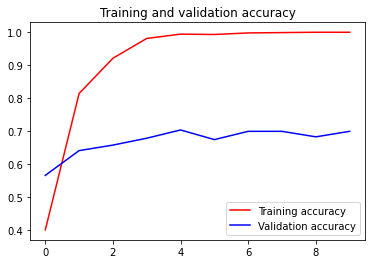

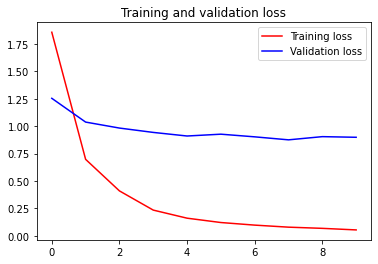

In [16]:
# Visualisasi accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc)) # Get number of epochs

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [17]:
# Classification Report
y_true = test_generator.classes

pred_result = model.predict(test_generator) 
y_pred = np.argmax(pred_result, axis=-1)

target_names = test_generator.class_indices
print(classification_report(y_true, y_pred, target_names=target_names))

15/15 [==============================] - 17s 1s/step
                   precision    recall  f1-score   support

       Abyssinian       0.61      0.70      0.65        20
           Bengal       0.76      0.80      0.78        20
           Birman       0.62      0.75      0.68        20
           Bombay       1.00      0.90      0.95        20
British_Shorthair       0.78      0.70      0.74        20
     Egyptian_Mau       0.86      0.90      0.88        20
       Maine_Coon       0.82      0.70      0.76        20
          Persian       0.78      0.70      0.74        20
          Ragdoll       0.68      0.65      0.67        20
     Russian_Blue       0.64      0.80      0.71        20
          Siamese       0.81      0.65      0.72        20
           Sphynx       0.80      0.80      0.80        20

         accuracy                           0.75       240
        macro avg       0.76      0.75      0.76       240
     weighted avg       0.76      0.75      0.76       240



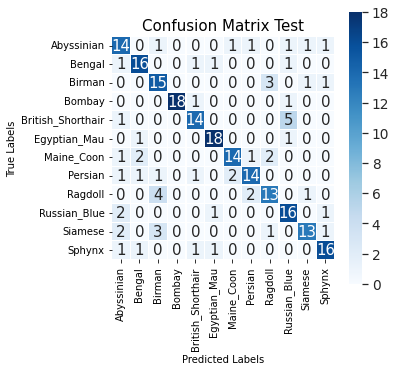

In [23]:
# confusion matrix 
labels = test_generator.class_indices
labels = [label.replace(" ","\n").title() for label in labels]

cmatrix_result = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(5,5))
ax = plt.subplot()

data = np.asarray(cmatrix_result).reshape(12,12)

sns.set(font_scale=1.25)
sns.heatmap(data,
            annot=True,
            ax=ax,
            cmap="Blues",
            square=True,
            linewidths=.3,
            xticklabels=labels,
            yticklabels=labels)
ax.set_xlabel("Predicted Labels")
ax.set_ylabel("True Labels")
ax.set_title("Confusion Matrix")

plt.yticks(rotation=0)
plt.title("Confusion Matrix Test")
plt.show()

In [24]:
saved_model_path = '/content/drive/MyDrive/cat_dataset/model/cat_model.h5'

# Save model h5
model.save(saved_model_path)

Saving Abyssinian_1.jpg to Abyssinian_1.jpg
1/1 [==============================] - 1s 751ms/step


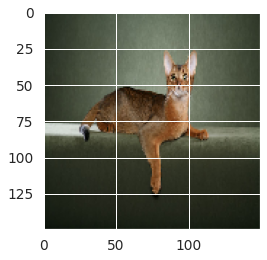

Terdeteksi  Abyssinian
Abyssinian: 98.31%
Bengal: 0.46%
Birman: 0.02%
Bombay: 0.15%
British_Shorthair: 0.14%
Egyptian_Mau: 0.02%
Maine_Coon: 0.40%
Persian: 0.04%
Ragdoll: 0.05%
Russian_Blue: 0.15%
Siamese: 0.04%
Sphynx: 0.22%


In [25]:
labels = train_generator.class_indices.keys()
uploaded = files.upload()

for paths in uploaded.keys():
 
  # predicting images
  path = paths
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  images /= 255
  proba = model.predict(images)[0]
  predicted_class_indices=np.argmax(proba)
  plt.imshow(img)
  plt.show()
  if predicted_class_indices == 0:
    print('Terdeteksi  Abyssinian')
  elif predicted_class_indices == 1:
    print('Terdeteksi Bengal')
  elif predicted_class_indices == 2:
    print('Terdeteksi Birman')
  elif predicted_class_indices == 3:
    print('Terdeteksi Bombay')
  elif predicted_class_indices == 4:
    print('Terdeteksi British Shorthair')
  elif predicted_class_indices == 5:
    print('Terdeteksi Egyptian Mau')
  elif predicted_class_indices == 6:
    print('Terdeteksi Maine Coon')
  elif predicted_class_indices == 7:
    print('Terdeteksi Persian')
  elif predicted_class_indices == 8:
    print('Terdeteksi Ragdoll')
  elif predicted_class_indices == 9:
    print('Terdeteksi Russian Blue')
  elif predicted_class_indices == 10:
    print('Terdeteksi Siamese')
  elif predicted_class_indices == 11:
    print('Terdeteksi Sphynx')

  for (label, p) in zip(labels, proba):
    print("{}: {:.2f}%".format(label, p * 100))